# Predicting Movie Genres: Stupid
Here we examine a hard-coded approach to predicting movie generes based on script excerpts.

This notebook can be found in its most recent state here:
https://github.com/wlifferth/movies-compeition

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
train_master = pd.read_csv("train.csv", index_col=0)
train_master.head(3)

,text,genre
id,,
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
2,"t, summa cum laude and all. And I'm about to l...",comedy
3,"up Come, I have a surprise.... She takes him ...",drama


In [13]:
test_master = pd.read_csv("test.csv", index_col=0)
test_master.head(3)

,text
id,
1,glances at her. BOOK Maybe I ought to learn t...
8,hout breaking stride. Tatiana sees her and can...
13,dead bodies. GEORDI Mitchell... DePaul... LANG...


drama        0.392976
thriller     0.302228
comedy       0.130254
action       0.105939
sci-fi       0.027149
horror       0.020196
other        0.011958
adventure    0.006510
romance      0.002790
Name: genre, dtype: float64


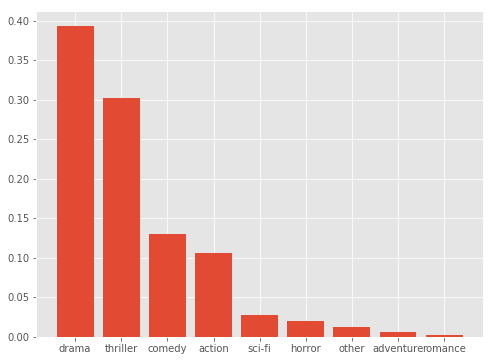

In [14]:
value_counts = train_master['genre'].value_counts(normalize=True)
print(value_counts)
plt.style.use('ggplot')
plt.figure(num=None, figsize=(8, 6))
plt.bar(value_counts.index, value_counts)
plt.show()

In [15]:
def model(text):
    words = text.split()
    if words.count('laugh') > 2:
        return 'comedy'
    else:
        return 'drama'

In [16]:
predictions = train_master['text'].apply(model)

In [17]:
def score_accuracy(actuals, predictions):
    correct = 0
    for x, y in zip(actuals, predictions):
        if x == y:
            correct += 1
    return correct / len(actuals)

In [18]:
score_accuracy(train_master['genre'], predictions)

0.3929757739492449

In [19]:
test_master['genre'] = test_master['text'].apply(model)
test_master.head()

,text,genre
id,,
1,glances at her. BOOK Maybe I ought to learn t...,drama
8,hout breaking stride. Tatiana sees her and can...,drama
13,dead bodies. GEORDI Mitchell... DePaul... LANG...,drama
24,take myself. BRANDON How bad is the other thi...,drama
38,"her body to shield his own. KAY Freeze it, Bug...",drama


In [20]:
test_master.drop(columns=['text']).to_csv('sample_submission.csv')